In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# file_name = "./PyData/" + "Plates" + "_Kin.csv"
# data = pd.read_csv(file_name, header=None, index_col=0)
# # print(data.sum().sum())
# # print(len(data.iloc[0]))
# # print(np.unique(data.index))
# objects = np.unique(data.index)
# new_dat = data.loc[objects[0]].mean()

# print(objects)
# print(data.index)


Saved  ./PyData/Weights_MEAN_Mugs_KIN_EMG_Norm.png
Saved  ./PyData/Weights_MEAN_Plates_KIN_EMG_Norm.png
Saved  ./PyData/Weights_MEAN_Geometric_KIN_EMG_Norm.png
Saved  ./PyData/Weights_MEAN_Cutlery_KIN_EMG_Norm.png
Saved  ./PyData/Weights_MEAN_Ball_KIN_EMG_Norm.png


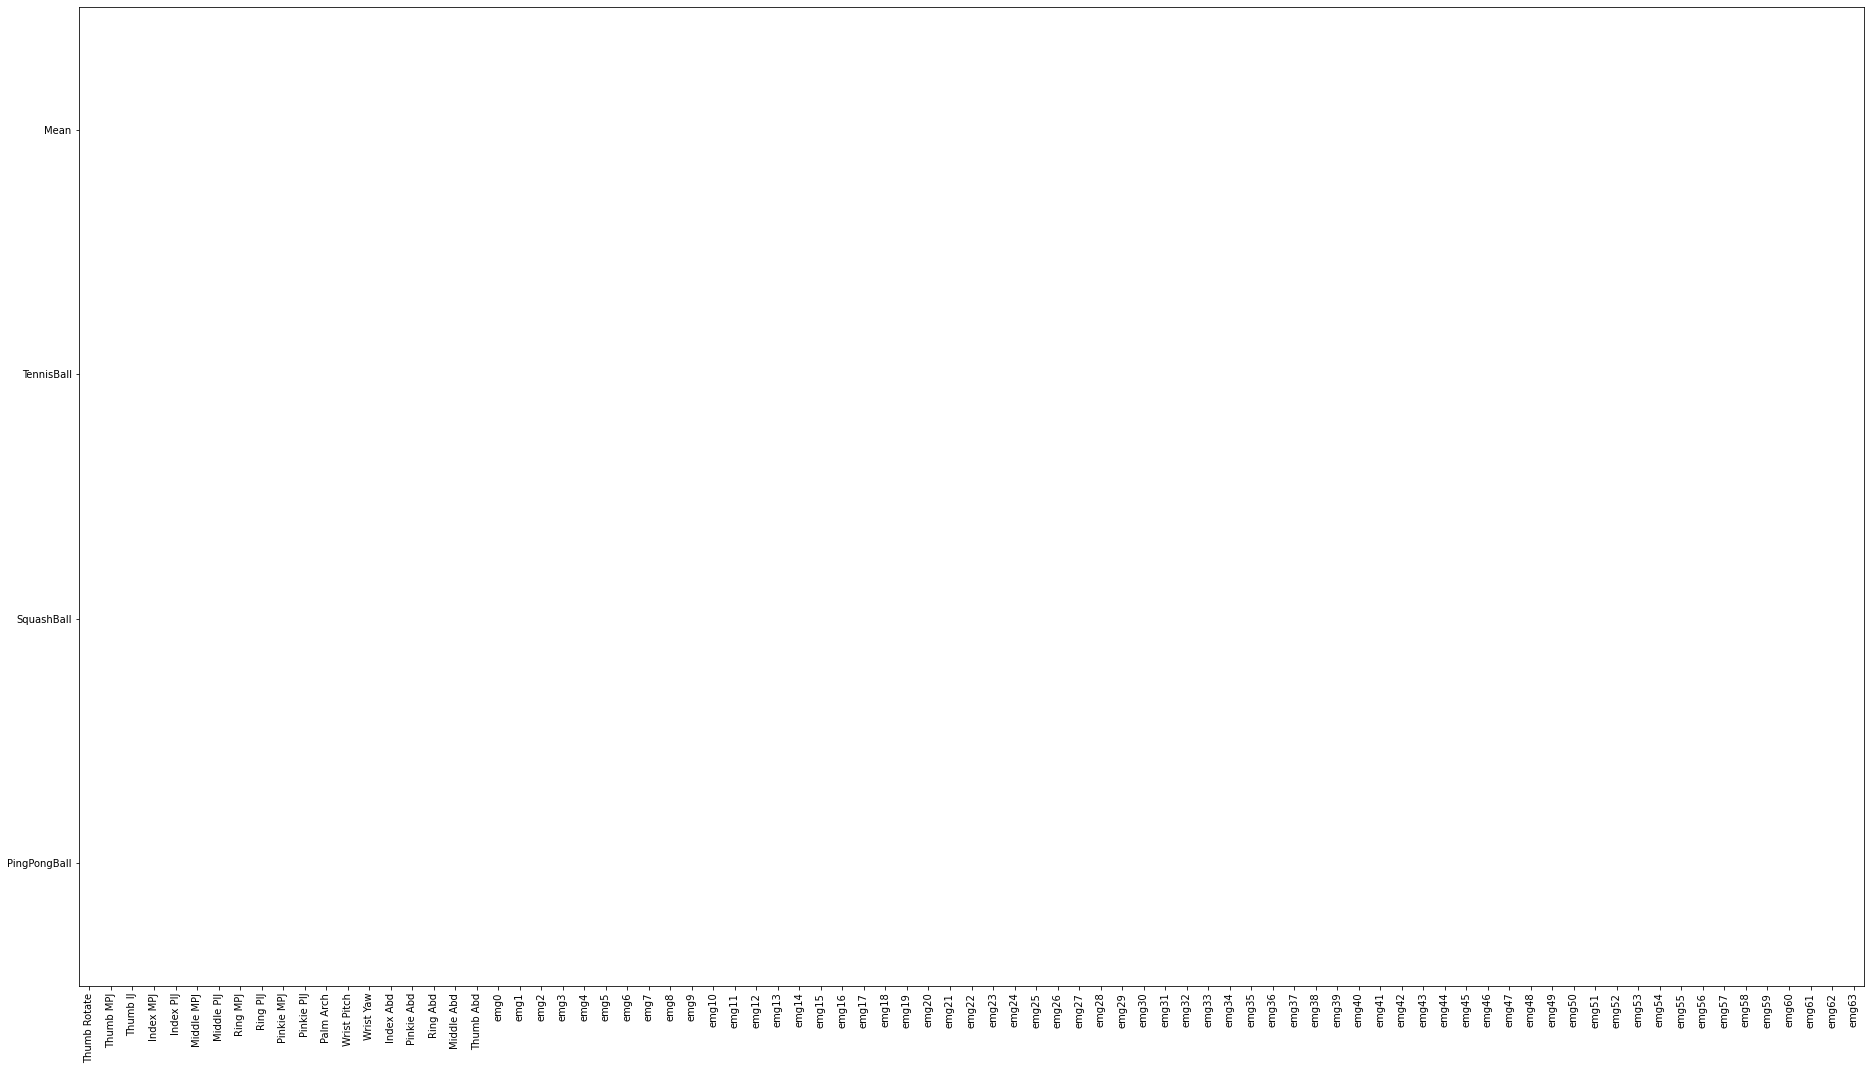

In [3]:
families = ('Mugs', 'Plates', 'Geometric', 'Cutlery', 'Ball')

emg_labels = ['emg' + str(i) for i in range(0,64)]
kin_labels = ["Thumb Rotate", "Thumb MPJ", "Thumb IJ", "Index MPJ", "Index PIJ", "Middle MPJ", "Middle PIJ", "Ring MPJ", "Ring PIJ", "Pinkie MPJ", "Pinkie PIJ", "Palm Arch", "Wrist Pitch", "Wrist Yaw", "Index Abd", "Pinkie Abd", "Ring Abd", "Middle Abd", "Thumb Abd"]
labels = kin_labels + emg_labels

for it in range(len(families)):
    
    # file_name = "./PyData/" + families[it] + "_Kin_EMG.csv"
    file_name = "./PyData/KIN_EMG_Norm_weights_N10_" + families[it] + ".csv" # SIZE: [(num_models * objects_per_family), (kin_dim + emg_dim)]
    data = pd.read_csv(file_name, header=None, index_col=0)
    objects = np.unique(data.index)
     
    new_dat = list()
    for it2 in range(len(objects)):
        new_dat.append(np.transpose(data.loc[objects[it2]].mean())) # We compute the mean by object, new size: [objects_per_family, (kin_dim + emg_dim)]    
        
    new_df = pd.DataFrame(new_dat, index=objects)
    new_df.loc['Mean'] = new_df.mean()
    # print(new_df.max().max())
    # print(new_df.min().min())
    p = plt.pcolor(new_df, cmap='Greys', vmin=new_df.min().min(), vmax=new_df.max().max())
    # print(new_df.index) 
    plt.yticks(np.arange(0.5, len(new_df.index), 1), new_df.index)
    plt.xticks(np.arange(0.5, len(new_df.columns), 1), labels, rotation='vertical')
    cb = plt.colorbar(p)
    plt.gcf().set_size_inches(32, 18)
    # plt.show()
    save_file = "./PyData/Weights_MEAN_" + families[it] + "_KIN_EMG_Norm.png"
    plt.savefig(save_file, bbox_inches="tight")
    cb.remove()
    p.remove()
    print("Saved ", save_file)